![Generating Embeddings](../../images/headings/01_embeddings_03_02_reducing_and_visualizing_embeddings.png)

## Setup
### Import required modules

In [1]:
%matplotlib widget
import os
import matplotlib as mpl
import mplcursors
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from PIL import Image

## Configure the embedding model

In [2]:
from langchain_aws.embeddings import BedrockEmbeddings

# The model_id parameter specifies the AWS Bedrock hosted model to use. In this case, we're going to use 'cohere.embed-english-v3'.
emb = BedrockEmbeddings(model_id='cohere.embed-english-v3')

## Load the dataset

In [3]:
from datasets import load_dataset

dataset = load_dataset("TheBritishLibrary/blbooksgenre", split="train", name='annotated_raw')

In [4]:
titles = dataset["Title"]
print(titles[:3])

['The Canadian farmer. A missionary incident [Signed: W. J. H. Y, i.e. William J. H. Yates.]', 'The Canadian farmer. A missionary incident [Signed: W. J. H. Y, i.e. William J. H. Yates.]', 'The Canadian farmer. A missionary incident [Signed: W. J. H. Y, i.e. William J. H. Yates.]']


## Generate embeddings from the dataset

In [5]:
import os
import pickle

embeddings = None
pickle_file = 'embeddings.pkl'

if os.path.exists(pickle_file):
    try:
        with open(pickle_file, 'rb') as f:
            embeddings = pickle.load(f)
    except Exception as e:
        print(f"Error loading embeddings from {pickle_file}: {e}")

if embeddings is None:
    embeddings = emb.embed_documents(titles)
    with open(pickle_file, 'wb') as f:
        pickle.dump(embeddings, f)

In [8]:
print(len(embeddings))

4398


## Reduce the embeddings to two dimensions using t-SNE

In [9]:
## Two-Dimensional Plot
### Reduce to two dimensions using t-SNE

In [10]:
import numpy as np
from sklearn.manifold import TSNE

# Ensure embeddings is a numpy array
embeddings_array = np.array(embeddings)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=4)
two_d = tsne.fit_transform(embeddings_array)

### Grab the annotator_genre values from the dataset

In [11]:
annotator_genres = dataset["annotator_genre"]

### Create a color palette

In [12]:
# Create a color palette for the annotated genres
palette = sns.color_palette("hsv", 4)  # 4 unique colors for 4 genres
color_map = {i: palette[i] for i in range(4)}

# Map genres to colors
colors = [color_map[annotator_genre] for annotator_genre in annotator_genres]

### Plot the result

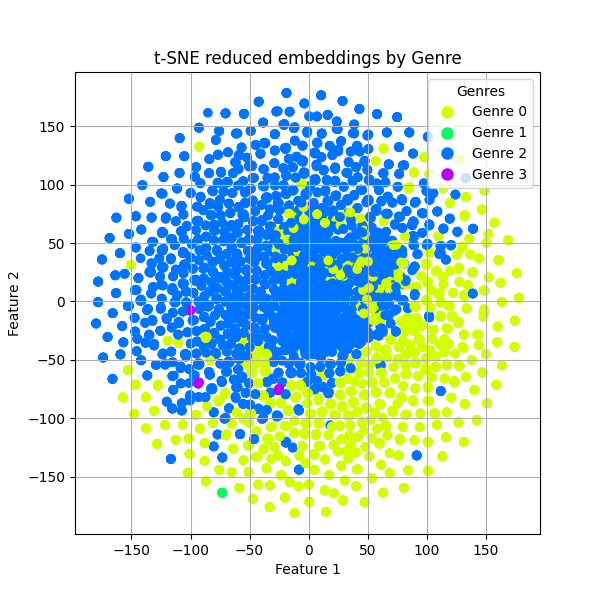

In [13]:
plt.figure(figsize=(6, 6))
scatter = plt.scatter(two_d[:, 0], two_d[:, 1], c=colors, marker='o')
plt.title('t-SNE reduced embeddings by Genre')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

# Create a legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10, label=f'Genre {i}') for i in range(4)]
plt.legend(handles=legend_handles, title="Genres")

# Add interactive hover text
cursor = mplcursors.cursor(scatter, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(titles[sel.index]))

plt.show()

## Exercises

- Try displaying another field besides the Title when hovering
- Swap out the annotator_genres for another grouping

## Discussion Questions

- Does it seem like too many embeddings for one plot?
- This example is slightly contrived, but can you envision ways that visualizing your data would be beneficial?
- How did the pickle file help out here?